<a href="https://colab.research.google.com/github/SirinootKK/intern/blob/main/ID9_Thai_QA_with_SimpleTransformer_(Wangchanberta).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to make Thai QA System using SimpleTransformer
- Pretrain Model: [Wangchanberta](https://medium.com/airesearch-in-th/wangchanberta-%E0%B9%82%E0%B8%A1%E0%B9%80%E0%B8%94%E0%B8%A5%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B8%A1%E0%B8%A7%E0%B8%A5%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%83%E0%B8%AB%E0%B8%8D%E0%B9%88%E0%B9%81%E0%B8%A5%E0%B8%B0%E0%B8%81%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B8%AB%E0%B8%99%E0%B9%89%E0%B8%B2%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%AA%E0%B8%B8%E0%B8%94%E0%B9%83%E0%B8%99%E0%B8%82%E0%B8%93%E0%B8%B0%E0%B8%99%E0%B8%B5%E0%B9%89-d920c27cd433)
- Training: [Simple Transformer QA](https://simpletransformers.ai/docs/qa-minimal-start/)
- Author: Kobkrit Viriyayudhakorn [kobkrit@iapp.co.th](mailto:kobkrit@iapp.co.th)
- Written on 14 Apr 2022
-Modified by Kietikul Jearanaitanakij (Apr 23, 2023)
- Later Modified by Sirinoot Ketkham (Jun
 19, 2023)

https://simpletransformers.ai/docs/qa-model/

# **เสร็จแล้ว รอเทรนกับข้อมูลเต็มจำนวน**



> ID8 : update Training & Validation loss Graph add Hyperparameter

ref = https://discuss.pytorch.org/t/what-happens-when-loss-are-negative/47883/3
!! use GPU V100 for Deep Learning !!



# Step 0 : Install dependencies

In [1]:
! pip install -q simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 125.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 21.6 MB/s eta 0:00:00

In [2]:
! pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 54.7 MB/s eta 0:00:00


In [3]:
from sklearn.metrics.pairwise import cosine_similarity  # ใช้หาค่าความคล้ายคลึง
import numpy as np
import pandas as pd

In [4]:
#from datasets import load_dataset
#from transformers import AutoTokenizer
import numpy as np
import pandas as pd

dataset_path = "https://raw.githubusercontent.com/SirinootKK/intern/main/dataset/BERTa_ThaiQA_Corpus_Full.csv"

# from google.colab import files,drive
# drive.mount('/content/gdrive')
# dataset_path = '/content/gdrive/MyDrive/data/Full_ThaiQA_Corpus_wangchanberta.csv'

df = pd.read_csv(dataset_path)
df.dropna(inplace=True)
len(df)

17000

# Step 1 : Preparing data

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state = 217)
train, valid = train_test_split(train, test_size=0.25, random_state = 217)
print(len(train) , ' ' , len(valid), ' ' , len(test))
train.head()

10200   3400   3400


,context,question,answer
8874,"เพลง ""อยู่ต่อเลยได้ไหม"" ของสิงโต นำโชค ได้ถูกน...","เพลง ""อยู่ต่อเลยได้ไหม"" ของสิงโต นำโชค ได้ถูกน...",2555
12893,ในกลุ่มดาวหมีเล็กดาวฤกษ์ดวงใดสว่างที่สุด ดาว...,ในกลุ่มดาวหมีเล็กดาวฤกษ์ดวงใดสว่างที่สุด,ดาวเหนือ
3173,ส่วนช่อดอกของหน้าวัวเรียกว่าอะไร ปลี,ส่วนช่อดอกของหน้าวัวเรียกว่าอะไร,ปลี
11388,ลิฉุยเป็นนายทหารของใครในนวนิยายจีนเรื่องสามก๊ก...,ลิฉุยเป็นนายทหารของใครในนวนิยายจีนเรื่องสามก๊ก,ตั๋งโต๊ะ
5715,ประเทศอาร์มีเนีย เข้าร่วมการแข่งขันกีฬาโอลิมปิ...,ประเทศอาร์มีเนีย เข้าร่วมการแข่งขันกีฬาโอลิมปิ...,28


In [6]:
train_question_id = []
train_article_id = []
valid_question_id = []
valid_article_id = []
test_question_id = []
test_article_id = []

for i in range(len(train)):
  train_question_id.append(str(i))
  train_article_id.append(str(i))

for i in range(len(valid)):
  valid_question_id.append(str(i+len(train)))
  valid_article_id.append(str(i+len(train)))

for i in range(len(test)):
  test_question_id.append(str(i+len(train)+len(valid)))
  test_article_id.append(str(i+len(train)+len(valid)))

In [7]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import datasets
from datasets import Dataset
train_set = { 'question_id': train_question_id,
              'article_id': train_article_id,
              'context' : train['context'],
              'question' : train['question'],
              'answer' : train['answer']
              #'answers' : Dataset.from_dict( { 'text': list(train['answer']), 'answer_start': list(train['answer_start'])} )
            }
valid_set = { 'question_id': valid_question_id,
              'article_id': valid_article_id,
              'context' : valid['context'],
              'question' : valid['question'],
              'answer' : valid['answer']
              #'answers' : Dataset.from_dict( { 'text': list(valid['answer']), 'answer_start': list(valid['answer_start'])} )
            }
test_set  = { 'question_id': test_question_id,
              'article_id': test_article_id,
              'context' : test['context'],
              'question' : test['question'],
              'answer' : test['answer']
              #'answers' : Dataset.from_dict( { 'text': list(test['answer']), 'answer_start': list(test['answer_start'])} )
            }
raw_datasets = datasets.DatasetDict({
    'train': Dataset.from_dict(train_set),
    'validation': Dataset.from_dict(valid_set),
    'test': Dataset.from_dict(test_set)})

In [9]:
raw_datasets['train']['context'][0]

'เพลง "อยู่ต่อเลยได้ไหม" ของสิงโต นำโชค ได้ถูกนำออกเผยแพร่ในปี พ.ศ. อะไร   2555'

In [10]:
import pandas as pd
train_df = pd.DataFrame(raw_datasets['train'])
validation_df = pd.DataFrame(raw_datasets['validation'])
test_df = pd.DataFrame(raw_datasets['test'])

# Step 2 : Word Tokenization

### สร้าง convert_to_simpletransformer_format
 method ไว้สำหรับแปลง format  Data เราให้ใช้กับ model Transformer ได้

In [11]:
import json
from pythainlp.tokenize import word_tokenize

In [12]:
def convert_to_simpletransformer_format(df):
  all = {}
  for (idx, row) in df.iterrows():
    #print('*******')
    #print(row)
    #print('#######')
    answers = row["answer"]
    if (row["article_id"] not in all):
      all[row["article_id"]] = {"context": " ".join(word_tokenize(row['context'],engine="newmm-safe")), "qas":[]}
    question_text = " ".join(word_tokenize(row['question'],engine="newmm-safe"))
    #answer_text = " ".join(word_tokenize(answers["text"][0],engine="newmm-safe"))
    answer_text = " ".join(word_tokenize(answers,engine="newmm-safe"))
    try:
      answer_start = all[row["article_id"]]["context"].index(answer_text)
      all[row["article_id"]]["qas"].append({"id":row["question_id"], "is_impossible": False, "question": question_text, "answers": [{"text":answer_text, "answer_start": answer_start}]})
    except Exception as e:
      print("Context:" +all[row["article_id"]]["context"])
      print("Answer:" +answer_text)
      print("Exception:" +str(e))
  return list(all.values())

### ทดลองใช้ convert_to_simpletransformer_format

In [13]:
test_df

,question_id,article_id,context,question,answer
0,13600,13600,รัฐที่สำคัญที่สุดในบริเวณประเทศกัมพูชาในสมัยโบ...,รัฐที่สำคัญที่สุดในบริเวณประเทศกัมพูชาในสมัยโบ...,ฟูนัน
1,13601,13601,"""ปาร์ตี"" เป็นเพลงจากวงเกิร์ลกรุปญี่ปุ่นจากสตูด...","""ปาร์ตี"" เป็นเพลงจากวงเกิร์ลกรุปญี่ปุ่นจากสตูด...",ไม่ใช่
2,13602,13602,ดอกคำฝอยให้รงควัตถุใดที่ทำให้เกิดสีแดง สามารถน...,ดอกคำฝอยให้รงควัตถุใดที่ทำให้เกิดสีแดง สามารถน...,คาร์ทามิน
3,13603,13603,วงลาบานูนได้รับรางวัลเพลงที่ถูกกล่าวถึงมากที่ส...,วงลาบานูนได้รับรางวัลเพลงที่ถูกกล่าวถึงมากที่ส...,เชือกวิเศษ
4,13604,13604,ดร.นิเวศน์ เหมวชิรวรากร ได้รับการยอมรับว่าเป็น...,ดร.นิเวศน์ เหมวชิรวรากร ได้รับการยอมรับว่าเป็น...,การลงทุนแบบเน้นคุณค่า
...,...,...,...,...,...
3395,16995,16995,เมืองซันตันเดร์เป็นเมืองหลักและเมืองท่าของแคว้...,เมืองซันตันเดร์เป็นเมืองหลักและเมืองท่าของแคว้...,แคว้นกันตาเบรีย
3396,16996,16996,ใครคืออาจารย์ใหญ่คนแรกของโรงเรียนอ้อมน้อยโสภณช...,ใครคืออาจารย์ใหญ่คนแรกของโรงเรียนอ้อมน้อยโสภณช...,นายสมปอง สุวรรณโฉม
3397,16997,16997,จริงหรือไม่ที่โอฟิยูรอยด์เป็นชั้นหนึ่งในไฟลัมเ...,จริงหรือไม่ที่โอฟิยูรอยด์เป็นชั้นหนึ่งในไฟลัมเ...,ใช่
3398,16998,16998,รัฐกัว ประเทศอินเดีย เคยเป็นอาณานิคมของโปรตุเก...,รัฐกัว ประเทศอินเดีย เคยเป็นอาณานิคมของโปรตุเก...,450 ปี


#### Format data หลังทำการ convert to simpletransformer

In [14]:
convert_to_simpletransformer_format(test_df)

[{'context': 'รัฐ ที่ สำคัญ ที่สุด ใน บริเวณ ประเทศ กัมพูชา ใน สมัยโบราณ คือ อาณาจักร พนม   ซึ่ง จีน เรียก ว่า อะไร     ฟูนัน',
  'qas': [{'id': '13600',
    'is_impossible': False,
    'question': 'รัฐ ที่ สำคัญ ที่สุด ใน บริเวณ ประเทศ กัมพูชา ใน สมัยโบราณ คือ อาณาจักร พนม   ซึ่ง จีน เรียก ว่า อะไร',
    'answers': [{'text': 'ฟูนัน', 'answer_start': 106}]}]},
 {'context': '"ปาร์ ตี "   เป็น เพลง จาก วง เกิร์ล กรุ ป ญี่ปุ่น จาก สตูดิโอ อัลบั้ม ปี   2015   และ ออก จำหน่าย เป็น ซิงเกิล นำ โดย ค่าย เอส เอ็ม เอนเตอร์เทนเมนต์ ใช่ หรือไม่     ไม่ ใช่',
  'qas': [{'id': '13601',
    'is_impossible': False,
    'question': '"ปาร์ ตี "   เป็น เพลง จาก วง เกิร์ล กรุ ป ญี่ปุ่น จาก สตูดิโอ อัลบั้ม ปี   2015   และ ออก จำหน่าย เป็น ซิงเกิล นำ โดย ค่าย เอส เอ็ม เอนเตอร์เทนเมนต์ ใช่ หรือไม่',
    'answers': [{'text': 'ไม่ ใช่', 'answer_start': 166}]}]},
 {'context': 'ดอก คำฝอย ให้ รงควัตถุ ใด ที่ ทำให้เกิด สีแดง   สามารถ นำมาใช้ ย้อมสี และ ผสม อาหาร ได้     คาร์ ทา มิ น',
  'qas': [{'id': '13602',
   

# Step 3 : Train the model

https://simpletransformers.ai/docs/qa-model/

In [15]:
import logging
import torch

from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

train_data = convert_to_simpletransformer_format(train_df)
validation_data = convert_to_simpletransformer_format(validation_df)
test_data = convert_to_simpletransformer_format(test_df)

# Configure the model
model_args = QuestionAnsweringArgs()

model_args.loss_type = 'cross_entropy'

model_args.evaluate_during_training = True
model_args.save_best_model = True
model_args.overwrite_output_dir = True

model_args.train_batch_size = 32
model_args.num_train_epochs = 30
model_args.eval_batch_size = 16

model_args.dropout = 0.1
model_args.weight_decay = 0.01
model_args.learning_rate = 1e-05
model_args.adam_epsilon = 1e-06
# model_args.gradient_accumulation_steps = 8

model = QuestionAnsweringModel(
    "camembert", "airesearch/wangchanberta-base-att-spm-uncased", args=model_args, use_cuda=torch.cuda.is_available()
)

Context:เภสัช วิเคราะห์ หมายถึง อะไร     การ ป ระ ยุกต์ ความ รู้ทาง เคมี วิเคราะห์ มา ใช้ ใน การ ตรวจสอบ เภสัช ภัณฑ์   ยา   อาหาร   เครื่องดื่ม   สารพิษ   สารเสพติด   และ   สาร ตัวอย่าง จาก แหล่ง ธรรมชาติ
Answer:การ ประยุกต์ ความ รู้ทาง เคมี วิเคราะห์ มา ใช้ ใน การ ตรวจสอบ เภสัช ภัณฑ์   ยา   อาหาร   เครื่องดื่ม   สารพิษ   สารเสพติด   และ   สาร ตัวอย่าง จาก แหล่ง ธรรมชาติ
Exception:substring not found


Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertForQuestionAnswering: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing CamembertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForQuestionAnswering were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN thi

In [16]:
!pip install wandb -qq
import wandb
import traceback

# Set the WANDB_TEAM environment variable
WANDB_API_KEY = '5a6baf1210ed659768873e6c4f21ff540162cb77'
wandb.login(key=WANDB_API_KEY)
wandb.init(
    entity="chatbot-chanan",
    resume=True,
    # id = '0iq9gkcj',
    project="WangchanBERTa",
    name="bertaFULL_e30_b32_ori"
    )

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sirinkk (chatbot-chanan). Use `wandb login --relogin` to force relogin


In [17]:
try:
  model.train_model(train_data, eval_data=validation_data)
  result, texts = model.eval_model(test_data)
  wandb.save('/content/outputs/best_model/training_args.bin')
  wandb.save('/content/outputs/best_model/pytorch_model.bin')
  wandb.save('/content/outputs/training_progress_scores.csv')

except Exception as e:
  traceback.print_exc()
  wandb.save("/content/outputs/training_args.bin")
  wandb.save('/content/outputs/pytorch_model.bin')
  try:
    wandb.save('/content/outputs/training_progress_scores.csv')
  except Exception as e:
    print('error to save the scores file!!')
  wandb.finish()


add example index and unique id: 100%|██████████| 10200/10200 [00:00<00:00, 304060.36it/s]


Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:05<00:00, 589.68it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 556587.78it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 1 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 806.49it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 642529.26it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 2 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:07<00:00, 485.08it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 581729.27it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 818.87it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 385142.62it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:05<00:00, 569.80it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 456293.67it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 752.60it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 504956.59it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/319 [00:00<?, ?it/s]



convert squad examples to features:   0%|          | 0/3399 [00:00<?, ?it/s]

convert squad examples to features:   0%|          | 1/3399 [00:02<1:58:56,  2.10s/it]

convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 794.76it/s]


add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 233486.29it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 815.24it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 679428.07it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:05<00:00, 571.76it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 289159.67it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 713.42it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 469378.70it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 765.19it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 282680.77it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 726.94it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 242972.97it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 691.75it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 351412.14it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/319 [00:00<?, ?it/s]



convert squad examples to features:   0%|          | 0/3399 [00:00<?, ?it/s]

convert squad examples to features:   0%|          | 1/3399 [00:03<3:17:57,  3.50s/it]

convert squad examples to features: 100%|██████████| 3399/3399 [00:05<00:00, 596.71it/s]


add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 392890.90it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:06<00:00, 532.20it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 502996.84it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:05<00:00, 638.73it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 249670.57it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 725.14it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 474013.81it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 789.96it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 574949.16it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:06<00:00, 548.42it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 512011.18it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:05<00:00, 660.08it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 274346.95it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/319 [00:00<?, ?it/s]



convert squad examples to features:   0%|          | 0/3399 [00:00<?, ?it/s]

convert squad examples to features:   0%|          | 1/3399 [00:02<2:22:51,  2.52s/it]

convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 728.74it/s]


add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 502588.99it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:05<00:00, 594.02it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 613312.08it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 819.32it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 663923.96it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 830.79it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 258986.67it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:06<00:00, 548.63it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 704299.94it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 784.89it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 790268.25it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 785.42it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 442719.06it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:05<00:00, 654.23it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 220146.07it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/319 [00:00<?, ?it/s]



convert squad examples to features:   0%|          | 0/3399 [00:00<?, ?it/s]

convert squad examples to features:   0%|          | 1/3399 [00:03<3:24:11,  3.61s/it]

convert squad examples to features: 100%|██████████| 3399/3399 [00:05<00:00, 594.64it/s]


add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 587409.94it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 825.31it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 422550.74it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 752.80it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 220746.01it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:07<00:00, 473.25it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 345426.42it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 790.88it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 415809.35it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/319 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 3399/3399 [00:04<00:00, 799.44it/s]

add example index and unique id: 100%|██████████| 3399/3399 [00:00<00:00, 352917.10it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 3400/3400 [00:00<00:00, 504301.35it/s]


Running Evaluation:   0%|          | 0/213 [00:00<?, ?it/s]

wandb: WARNING Saving files without folders. If you want to preserve sub directories pass base_path to wandb.save, i.e. wandb.save("/mnt/folder/file.h5", base_path="/mnt")


In [18]:
# Make predictions with the model
to_predict = [
    {
        "context": "ฟักแฟง ชาร์จ แบต อยู่",
        "qas": [
            {
                "question": "ฟักแฟง ทำ อะไร",
                "id": "0",
            }
        ],
    }
]

answers, probabilities = model.predict(to_predict)

print(answers)
print(probabilities)

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2051.00it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'id': '0', 'answer': ['ฟักแฟง ชาร์จ แบต อยู่', 'ชาร์จ แบต อยู่', 'อยู่', 'แบต อยู่', 'ฟักแฟง']}]
[{'id': '0', 'probability': [0.7817036592144653, 0.11043691647559159, 0.09708027526637435, 0.01011297715873824, 0.0006657216367259875]}]


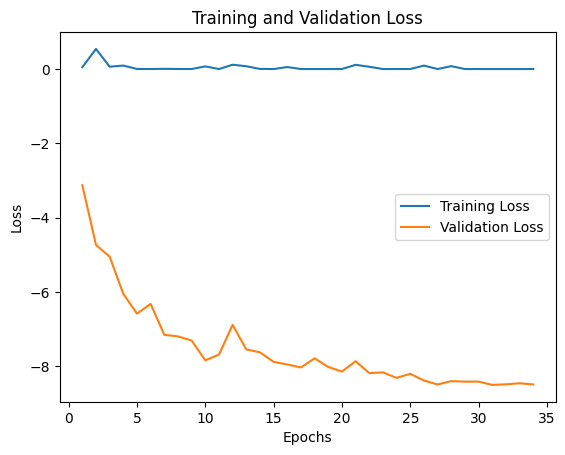

In [19]:
#@title Graph
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
train_valid_loss = pd.read_csv('/content/outputs/training_progress_scores.csv')

# Extract the train_loss and eval_loss columns
train_loss = train_valid_loss['train_loss']
eval_loss = train_valid_loss['eval_loss']



# Create a list of epochs (assuming it is a sequential index)
epochs = train_valid_loss.index + 1

# Plot the training loss and evaluation loss
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, eval_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Build Chatbot by finding the most similar document using Thai2Vec

In [20]:
from pythainlp import word_tokenize # ทำการเรียกตัวตัดคำ
#from pythainlp.word_vector import * # ทำการเรียก thai2vec
from sklearn.metrics.pairwise import cosine_similarity  # ใช้หาค่าความคล้ายคลึง
import numpy as np
from pythainlp import word_vector
wv_model = word_vector.WordVector(model_name="thai2fit_wv").get_model() # load thai2fit_wv from pythainlp

#create dataframe
thai2dict = {}
for word in wv_model.index_to_key:
    thai2dict[word] = wv_model[word]
thai2vec = pd.DataFrame.from_dict(thai2dict,orient='index')
thai2vec.head(10)

Corpus: thai2fit_wv
- Downloading: thai2fit_wv 0.1


  0%|          | 0/62452646 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
ที่,0.308956,-0.097699,0.116745,0.215612,0.015768,-0.064163,0.062168,0.039649,0.864940,0.846904,...,-0.142418,0.033241,0.171581,-0.624864,-0.009358,0.449131,0.120130,-0.122195,-0.450617,-0.071318
และ,0.010751,-0.618971,0.129665,0.035460,-0.007560,0.027607,0.397824,0.026543,0.254075,0.168328,...,-0.105786,0.180930,-0.101630,0.070885,-0.037263,0.183606,-0.049088,-0.672288,-1.293044,0.592576
เป็น,-0.015736,-0.258926,0.052953,0.153728,-0.005985,-0.021081,0.041088,0.057312,1.633230,0.442729,...,-0.009408,-0.252576,-0.305512,0.372542,0.049151,0.568470,0.266586,0.400800,-0.784650,0.197369
ของ,-0.189711,-0.174774,0.171124,-0.186771,0.054294,-0.114150,-1.109456,-0.094466,-0.447015,0.042377,...,-0.168676,-0.148738,0.680404,0.097702,0.020270,0.182967,-0.083949,0.006287,-0.707434,-0.070234
มี,-0.156962,-0.231863,0.080312,0.323157,0.215695,0.055145,0.420794,0.016842,0.256759,0.832864,...,-0.044267,-0.147186,-0.105424,0.907078,0.009299,0.550953,0.139337,0.031696,-0.670379,-0.008048
ได้,-0.428813,-0.031194,0.041922,-0.036608,-0.008106,0.076470,-0.782270,0.033361,0.606864,0.440520,...,0.024458,-0.025031,0.103389,-0.078255,0.034323,0.459774,-0.748643,0.337775,-0.487408,-0.511535
"""""""""",-0.287710,0.064193,0.205076,0.146356,-0.071343,-0.039451,-1.845461,0.163763,1.018096,0.272786,...,0.051024,-0.532856,-0.131856,-0.090323,-0.058895,0.151262,-0.420358,0.055971,-0.930814,0.163908
การ,0.239587,-0.303620,0.079953,-0.453045,-0.528826,-0.161692,0.235725,-0.099673,0.691668,0.536159,...,-0.110436,-0.297495,-0.217414,0.045158,0.066647,0.190095,-0.304333,-0.724927,-0.995488,-0.716609
(,-0.120522,-0.355783,0.168180,-0.377733,-0.158624,-0.047249,0.361140,0.161460,0.913314,0.345037,...,0.116285,-0.318218,-0.356664,0.519889,0.130475,0.125772,0.101328,-0.382658,-1.205359,0.340139
),-0.086848,-0.155231,0.133015,-0.039913,0.183761,0.115142,-1.940854,-0.066565,-2.399744,0.146722,...,0.019406,-0.181474,0.099863,0.516092,0.201697,0.249139,0.252957,1.138815,-0.018209,0.232265


In [21]:
def sentence_vectorizer(ss,dim=300,use_mean=True): # ประกาศฟังก์ชัน sentence_vectorizer
    s = word_tokenize(ss)
    vec = np.zeros((1,dim))
    for word in s:
        if word in wv_model.index_to_key:
            vec+= wv_model.get_vector(word)
        else: pass
    if use_mean: vec /= len(s)
    return vec
def sentence_similarity(s1,s2):
    return cosine_similarity(sentence_vectorizer(str(s1)),sentence_vectorizer(str(s2)))
    #return np.dot( np.array(sentence_vectorizer(str(s1))) , np.array(sentence_vectorizer(str(s2))) )

In [22]:
sentence_similarity("สวัสดีครับ", "สวัสดีคร้าบ")

array([[0.72666795]])

# Step 4 : Make predictions with the model


In [23]:
# Make predictions with the model

question = "พิกซาร์สตูดิโอตั้งอยู่ที่เมืองอะไร"
#tokenized_question = word_tokenize(question)
MostSimilarContext = ""
max_sim = 0

for c in df['context']:
  #tokenized_c = word_tokenize(c)
  #print(c)
  sim = sentence_similarity(question, c)
  if max_sim < sim:
    max_sim = sim
    MostSimilarContext = c

print(MostSimilarContext)
print(max_sim)

to_predict = [
    {
        #"context" : context,
        "context" : MostSimilarContext,
        "qas": [
            {
                "question": question,
                "id": "0",
            }
        ],
    }
]

answers, probabilities = model.predict(to_predict)

print(answers)
print(probabilities)

ปราสาทโบเดียมที่เมืองโรเบิร์ตสบริดจ์ ตั้งอยู่ในประเทศอะไร   สหราชอาณาจักร
[[0.79368407]]


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2816.86it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'id': '0', 'answer': ['สหราชอาณาจักร', 'ปราสาทโบเดียมที่เมืองโรเบิร์ตสบริดจ์ ตั้งอยู่ในประเทศอะไร สหราชอาณาจักร', 'อาณาจักร', 'ตั้งอยู่ในประเทศอะไร สหราชอาณาจักร', 'ปราสาทโบเดียมที่เมืองโรเบิร์ตสบริดจ์', 'ปราสาทโบเดียมที่เมืองโรเบิร์ตสบริดจ์ ตั้งอยู่ในประเทศอะไร', 'ม', 'สหราช', 'บริดจ์', 'เดีย', 'ส', 'ที่เมือง', 'โบ', 'อะไร', 'ตั้งอยู่ในประเทศอะไร', 'ตั้งอยู่ใน']}]
[{'id': '0', 'probability': [0.9998005499976645, 0.00019755444417661803, 1.7929562171710097e-06, 6.931708184219695e-08, 3.3193804333655936e-08, 3.932408853921577e-11, 3.026883154000619e-11, 1.6400725182266257e-11, 3.8822216638178786e-12, 9.912120502905037e-13, 8.38644600678679e-14, 4.559631605619938e-14, 2.3062001352969827e-14, 1.3797872657350424e-14, 1.0787851878951166e-14, 9.977132007400191e-15]}]


# Step 5 : Evaluate the model

In [24]:
def predict(model,question):
  question = question
  #tokenized_question = word_tokenize(question)
  MostSimilarContext = ""
  max_sim = 0

  for c in df['context']:
    #tokenized_c = word_tokenize(c)
    #print(c)
    sim = sentence_similarity(question, c)
    if max_sim < sim:
      max_sim = sim
      MostSimilarContext = c

  # print(MostSimilarContext)
  # print(max_sim)

  to_predict = [
      {
          #"context" : context,
          "context" : MostSimilarContext,
          "qas": [
              {
                  "question": question,
                  "id": "0",
              }
          ],
      }
  ]

  answers, probabilities = model.predict(to_predict)

  # print(answers)
  # print(probabilities)
  return answers[0]["answer"][0]

In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
#@title predict all test data and save y_list to wandb
import os

current_dir = os.getcwd()

file_name = 'y_list.txt'
file_path = os.path.join(current_dir, file_name)

y_pred_ls = []
y_true_ls = []
accls=[]
precls = []
recls=[]
f1ls=[]
try:
  for i in range(len(test_data)):
    # print('=====================',i,'===================')
    y_pred = predict(model,test_data[i]["qas"][0]['question'])
    # y_true = test_data[i]["qas"][0]['answers'][0]['text']
    y_true = test_df.iloc[i][4]
    y_pred_ls.append(y_pred)
    y_true_ls.append(y_true)

    with open(file_path, 'a') as file:
      file.write(f'Loop at {i}:\n')
      file.write(f'y_pred: {y_pred}\n')
      file.write(f'y_true: {y_true}\n')
      file.write('=====================\n')

    wandb.save("y_list.txt")

except Exception as e:
  traceback.print_exc()
  wandb.save("path_to_error_model")
  wandb.finish()


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3002.37it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3048.19it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3328.81it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3153.61it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3297.41it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 467.38it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3454.95it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 857.20it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3209.11it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3426.72it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3256.45it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2389.92it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 821.45it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 453.44it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 508.22it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 593.17it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 302.49it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3653.57it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 800.75it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2651.27it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3379.78it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3318.28it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 557.01it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
len(y_true_ls),len(y_pred_ls)

In [ ]:
result_df = pd.DataFrame()

result_df['y_true'] = y_true_ls
result_df['y_pred'] = y_pred_ls

# result_df

#Step 6 : Measure Performance
- Bleu
- Bluert
- Rouge : Rouge-L Rouge-1 Rouge-2
- accuracy
- precision
- recalls
- f1

In [1]:
#@title installation
!pip install rouge --q
!git clone https://github.com/google-research/bleurt.git
%cd bleurt
!pip install .

Cloning into 'bleurt'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 134 (delta 0), reused 17 (delta 0), pack-reused 116
Receiving objects: 100% (134/134), 31.28 MiB | 17.81 MiB/s, done.
Resolving deltas: 100% (49/49), done.
/content/bleurt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/bleurt
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.3 MB/s eta 0:00:00
  Created wheel for BLEURT: filename=BLEURT-0.0.2-py3-none-any.whl size=16456764 sha256=297e9887713fb26830026d8d032c4d6a6bfde04e432d4354449b688dee14a583
  Stored in directory: /tmp/pip-ephem-wheel-cache-oaaos90x/wheels/92/4f/fb/afa555fa27aa9e2c7958df797a62cc4e74f0f459cec9c4fa7c
Successfully built BLEURT


In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from statistics import mean
import pythainlp

In [ ]:
reference_sentences = y_true_ls
candidate_sentences = y_pred_ls

reference_tokens = [pythainlp.word_tokenize(sentence, engine='newmm-safe') for sentence in reference_sentences]
candidate_tokens = [pythainlp.word_tokenize(sentence, engine='newmm-safe') for sentence in candidate_sentences]


bleu_scores = []
for reference, candidate in zip(reference_tokens, candidate_tokens):
    score = sentence_bleu([reference], candidate, weights=(1, 0, 0, 0))
    bleu_scores.append(score)

# for i, score in enumerate(bleu_scores):
#     print(f"BLEU score row# {i+1}: {score}")

print('BLEU score -> {}'.format(mean(bleu_scores)))

In [ ]:
def tokenize_text_for_blurt (text):
  return " ".join(pythainlp.word_tokenize(text,engine="newmm-safe"))

In [ ]:
ref_cand_token = pd.DataFrame()

ref_cand_token['y_true_tk'] = y_true_ls
ref_cand_token['y_pred_tk'] = y_pred_ls

ref_cand_token['y_true_tk'] = ref_cand_token['y_true_tk'].apply(tokenize_text_for_blurt)
ref_cand_token['y_pred_tk'] = ref_cand_token['y_pred_tk'].apply(tokenize_text_for_blurt)
# ref_cand_token = tokenize_text_for_blurt(ref_cand_token)

ref_cand_token

In [ ]:
from bleurt import score

checkpoint = "bleurt/test_checkpoint"
references = ref_cand_token['y_true_tk']
candidates = ref_cand_token['y_pred_tk']

scorer = score.BleurtScorer(checkpoint)
bleurt_scores = scorer.score(references=references, candidates=candidates)
assert isinstance(bleurt_scores, list) and len(bleurt_scores) == len(bleurt_scores)
print('BLEURT Score -> {}'.format(mean(bleurt_scores)))

In [ ]:
from rouge import Rouge
rouge = Rouge()

num = 0

# Calculate Rouge score for each sentence pair
for ref, cand, daf, pred_ls in zip(ref_cand_token['y_true_tk'], ref_cand_token['y_pred_tk'],test_df['context'],y_pred_ls):
    scores = rouge.get_scores(ref, cand)
    cand_con = rouge.get_scores(daf, pred_ls)
    # print(f"Rouge-L score: {scores}")
    rouge_l_scores = scores[0]['rouge-l']['f']
    rouge_1_scores = scores[0]['rouge-1']['f']
    rouge_2_scores = scores[0]['rouge-2']['f']

    # avg_rouge_l_score = sum(rouge_l_scores) / len(rouge_l_scores)
    # avg_rouge_1_score = sum(rouge_1_scores) / len(rouge_1_scores)
    # avg_rouge_2_score = sum(rouge_2_scores) / len(rouge_2_scores)

    con_scores= cand_con[0]['rouge-l']['f']

    # print(rouge_l_scores, num,cand)
    # print('context vs cand => {} i => {}' .format(con_scores, num))
    # print("=================================")

    if(rouge_l_scores > 0.5 and con_scores < 0.9):
      num += 1
      # acc_ls.append(rouge_l_scores)
      # print('index {}, rougeL {}' .format(num, rouge_l_scores))


acc = num/len(y_true_ls)

print('accuracy -> {}'.format(acc))
print('precision -> {}'.format(metrics.precision_score(y_true_ls,y_pred_ls,average='macro')))
print('recall -> {}'.format(metrics.recall_score(y_true_ls,y_pred_ls,average='macro')))
print('f1 score -> {}'.format(metrics.f1_score(y_true_ls,y_pred_ls,average='macro')))
print('ROUGE-1 -> {}' .format(rouge_1_scores))
print('ROUGE-2 -> {}' .format(rouge_2_scores))
print('ROUGE-L -> {}' .format(rouge_l_scores))
print('BLEURT Score -> {}'.format(mean(bleurt_scores)))
print('BLEU score -> {}'.format(mean(bleu_scores)))

#wandb

In [ ]:
# Log the train_loss and eval_loss values
for epoch, (train, eval) in enumerate(zip(train_loss, eval_loss)):
    wandb.log({"train_loss": train, "eval_loss": eval})

wandb.save('output.log')

wandb.finish()